In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


def get_rating_from_tweet(rate):
    if '/10' in rate:
        indx = rate.index('/10')
        rating = rate[indx-2:indx]
        return rating
    else:
        return 'n/a'
    
def to_timestamp(date):
    return date.timestamp()

In [36]:
tweets = pd.read_csv('dog_rates_tweets.csv', parse_dates=['created_at'])
rates = tweets[tweets['text'].str.contains('/10')]
get_rating = np.vectorize(get_rating_from_tweet)

get_rating = np.vectorize(get_rating_from_tweet)

rates2 = rates.copy(deep=True)
rates2['rating'] = get_rating(rates2['text'])
rates2 = rates2[rates2['rating'].str.isdigit()]
rates2 = rates2._convert(numeric=True)
rates2['rating'] = rates2['rating'].astype('float')
rates2 = rates2[rates2['rating']<=25]
rates2 = rates2.reset_index(drop=True)

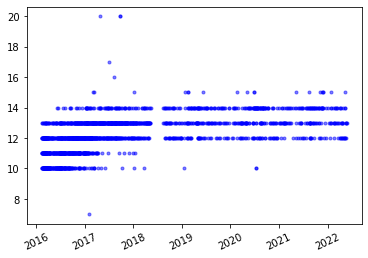

In [37]:
plt.xticks(rotation=25)
plt.plot(rates2['created_at'], rates2['rating'], 'b.', alpha=0.5)
plt.show()

In [38]:
rates2['timestamp'] = rates2['created_at'].apply(to_timestamp)
fit = stats.linregress(rates2['timestamp'], rates2['rating'])
rates2['prediction'] = rates2['timestamp']*fit.slope+fit.intercept
print(fit.slope, fit.intercept)
print("p-value: ", fit.pvalue)

1.215349932508294e-08 -6.074907163549957
p-value:  1.43133217093946e-145


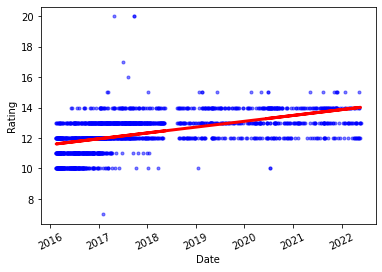

In [39]:
plt.xticks(rotation=25)
plt.plot(rates2['created_at'], rates2['rating'], 'b.', alpha=0.5)
plt.plot(rates2['created_at'], rates2['prediction'], 'r-', linewidth=3)
plt.xlabel("Date")
plt.ylabel("Rating")
plt.show()

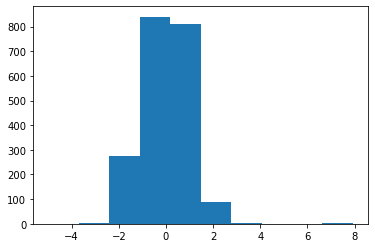

In [40]:
residuals = rates2['rating'] - rates2['prediction']
plt.hist(residuals)
plt.show() 

In [41]:
def get_year(date):
    return date.year

rates2['year']=rates2['created_at'].apply(get_year)


In [42]:
rates3 = rates2.groupby(rates2['year']).mean()

Text(0, 0.5, 'Average rating')

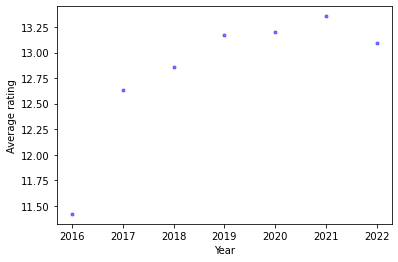

In [62]:
rates3 = rates3.reset_index(drop=False)
plt.plot(rates3['year'], rates3['rating'], 'b.', alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Average rating")

In [44]:
rates4 = rates2[rates2['rating']<=10]

Text(0, 0.5, 'Rating')

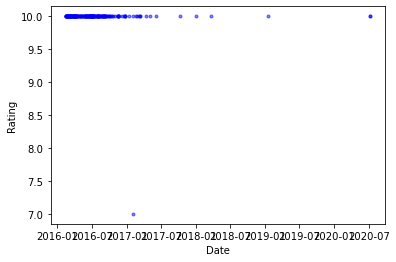

In [45]:
plt.plot(rates4['created_at'], rates4['rating'], 'b.', alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Rating")

In [55]:
# rates3 = rates3.reset_index(drop=False)
rates5 = rates2.groupby([rates2['year'], rates2['rating']]).count()

In [56]:
rates5

id  created_at  text  timestamp  prediction
year rating                                              
2016 10.0    184         184   184        184         184
     11.0    245         245   245        245         245
     12.0    259         259   259        259         259
     13.0    118         118   118        118         118
     14.0     11          11    11         11          11
2017 7.0       1           1     1          1           1
     10.0     11          11    11         11          11
     11.0     40          40    40         40          40
     12.0    173         173   173        173         173
     13.0    279         279   279        279         279
     14.0     55          55    55         55          55
     15.0      2           2     2          2           2
     16.0      1           1     1          1           1
     17.0      1           1     1          1           1
     20.0      3           3     3          3           3
2018 10.0      2           2     2          2           2
     11.0      1           1     1          1           1
     12.0     47          47    47         47          47
     13.0     74          74    74         74          74
     14.0     31          31    31         31          31
     15.0      1           1     1          1           1
2019 10.0      1           1     1          1           1
     12.0     32          32    32         32          32
     13.0     56          56    56         56          56
     14.0     52          52    52         52          52
     15.0      4           4     4          4           4
2020 10.0      2           2     2          2           2
     12.0     36          36    36         36          36
     13.0     55          55    55         55          55
     14.0     66          66    66         66          66
     15.0      4           4     4          4           4
2021 12.0     21          21    21         21          21
     13.0     44          44    44         44          44
     14.0     53          53    53         53          53
     15.0      6           6     6          6           6
2022 12.0     14          14    14         14          14
     13.0     21          21    21         21          21
     14.0     15          15    15         15          15
     15.0      2           2     2          2           2

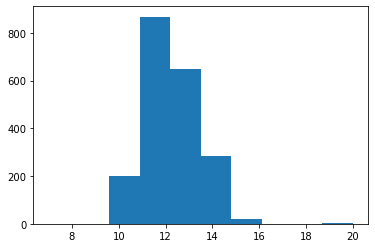

In [60]:
plt.hist(rates2['rating'])
plt.show() 